<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/Tugas_Presentasi_Kelompok_Image_Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
#import library yang akan digunakan
import matplotlib.pyplot as plt
import pickle, gzip
import numpy as np
import urllib.request

#import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Import Dataset dari DropBox

In [3]:
# Load the MNIST dataset
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# # Normalize the data to the range [0, 1]
# trainData = trainData.astype('float32') / 255.0
# testData = testData.astype('float32') / 255.0

# Split trainData into training and validation sets
trainData, valData, trainLabels, valLabels = train_test_split(
    trainData, trainLabels, test_size=0.2, random_state=42)

# Data Exploration

In [5]:
# Melihat jumlah data dalam dataset

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 48000
validation data points: 12000
testing data points: 10000


In [6]:
#Lihat label data

print('Label datanya : ', np.unique(trainLabels))
print('Ukuran matriks tiap datanya : ', trainData[0].shape) # ukuran datanya sudah dalam bentuk vektor (ukuran panjang dan lebarnya 28 x28)

Label datanya :  [0 1 2 3 4 5 6 7 8 9]
Ukuran matriks tiap datanya :  (28, 28)


label =  5


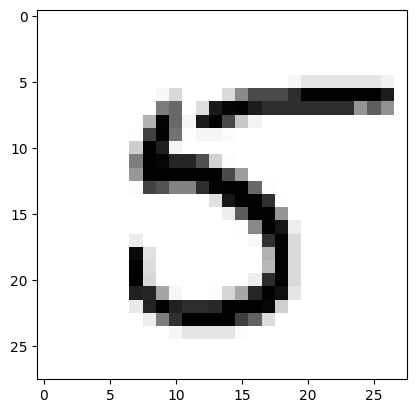

label =  0


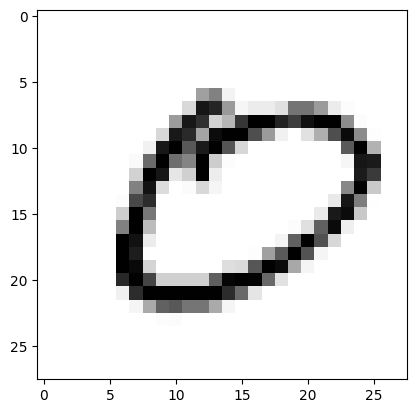

label =  1


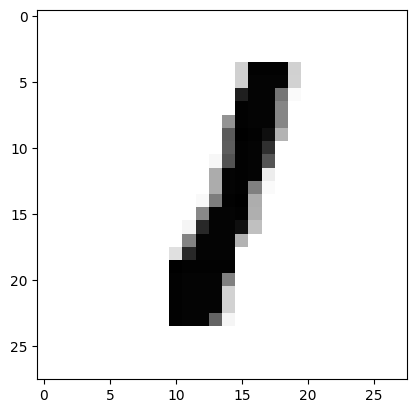

label =  6


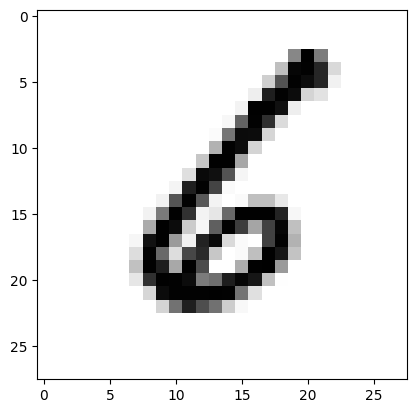

label =  1


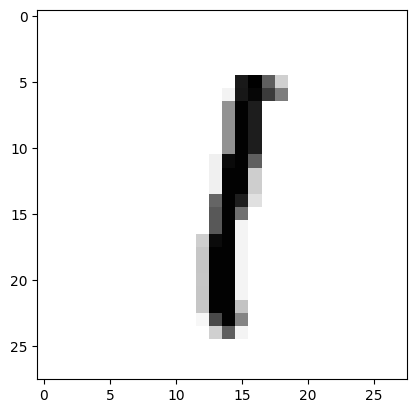

label =  3


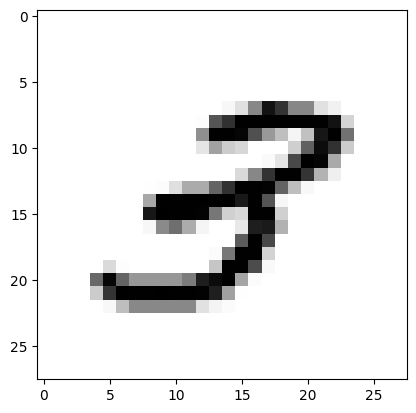

label =  8


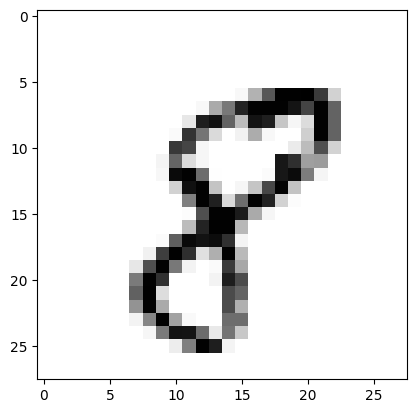

label =  8


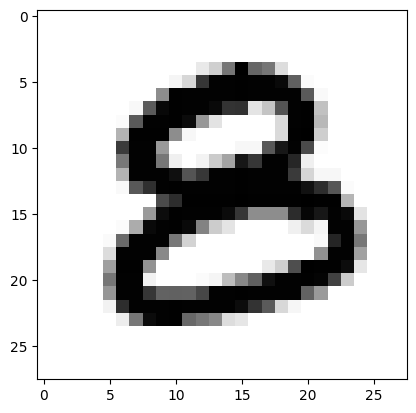

label =  1


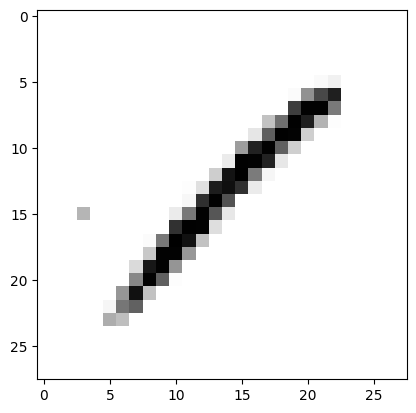

label =  8


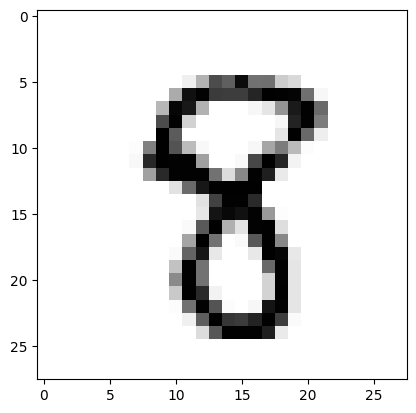

In [7]:
# Visualisasikan 10 data training pertama:

for i in range(10):
  image = trainData[i].reshape((28,28))
  print('label = ', trainLabels[i])
  plt.imshow(image, cmap="Greys") # cmap bisa diganti, coba ganti gray, Blues, Orange, Inferno
  plt.show()

In [ ]:
trainData.shape

(48000, 28, 28)

# Membangun Model CV menggunakan k-NN

In [8]:
trainData = trainData.reshape(trainData.shape[0], -1)
valData = valData.reshape(valData.shape[0], -1)
testData = testData.reshape(testData.shape[0], -1)

Referensi: [Precision, Recall, F1-Scores](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)

Referensi: [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html)

In [9]:
# Melatih model untuk menentukan k Optimal

for k in range (1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    score = model.score(valData, valLabels)
    scores = cross_val_score(model, valData, valLabels, cv = 5)
    print("k = %d | akurasi = %0.2f | akurasi cv: %0.2f" %(k, score, scores.mean()))

k = 1 | akurasi = 0.97 | akurasi cv: 0.95
k = 2 | akurasi = 0.96 | akurasi cv: 0.94
k = 3 | akurasi = 0.97 | akurasi cv: 0.95
k = 4 | akurasi = 0.97 | akurasi cv: 0.94
k = 5 | akurasi = 0.97 | akurasi cv: 0.94
k = 6 | akurasi = 0.97 | akurasi cv: 0.94
k = 7 | akurasi = 0.97 | akurasi cv: 0.94
k = 8 | akurasi = 0.97 | akurasi cv: 0.94
k = 9 | akurasi = 0.97 | akurasi cv: 0.94
k = 10 | akurasi = 0.97 | akurasi cv: 0.94
k = 11 | akurasi = 0.97 | akurasi cv: 0.94
k = 12 | akurasi = 0.96 | akurasi cv: 0.94
k = 13 | akurasi = 0.96 | akurasi cv: 0.94
k = 14 | akurasi = 0.96 | akurasi cv: 0.94
k = 15 | akurasi = 0.96 | akurasi cv: 0.93
k = 16 | akurasi = 0.96 | akurasi cv: 0.94
k = 17 | akurasi = 0.96 | akurasi cv: 0.93
k = 18 | akurasi = 0.96 | akurasi cv: 0.93
k = 19 | akurasi = 0.96 | akurasi cv: 0.93


In [10]:
# melatih ulang classifier menggunakan nilai k terbaik value dan memprediksikan label

model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=3)

# Evaluation

In [11]:
test_accuracy = model.score(testData, testLabels)
print(f"Achieved accuracy of {test_accuracy*100}% on test data")

Achieved accuracy of 96.81% on test data


In [12]:
predictions = model.predict(testData)
print("Classification Report")
print(classification_report(testLabels, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.93      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



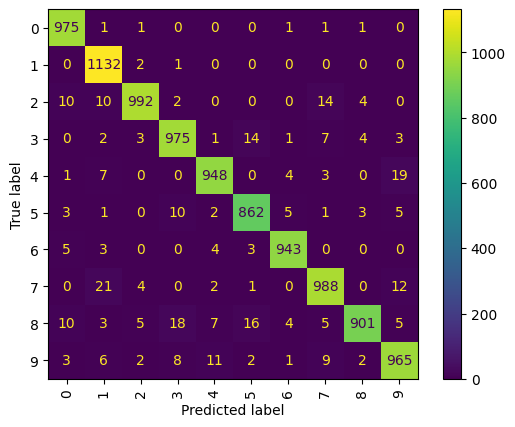

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(testLabels, model.predict(testData))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation='vertical', values_format='d')

# plot_confusion_matrix(model, testData, testLabels, xticks_rotation='vertical', values_format='d')

In [14]:
# Menyimpan model yang telah dibuat

import pickle
filename = 'knn_model.sav'
pickle.dump(model, open(filename, 'wb'))